O objetivo deste projeto é classificar fotos de algumas flores. Mais especificamente, a partir de um conjunto de dados do Kaggle, temos cinco tipos de flores: Margaridas, Dentes de Leão, Rosas, Girassóis e Tulipas, totalizando 4242 imagens.

Fonte de dados para a prática:
https://www.kaggle.com/alxmamaev/flowers-recognition

Dados foram carregados no GOOGLE DRIVE e foi feita a montagem de um drive para que o programa fizesse acesso aos dados.

**Aluno: Geraldo Barbosa do Amarante**
 

**Prática da Aula RECONHECIMENTO DE IMAGENS** 



**IMPORTANDO AS BIBLIOTECAS**

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import *
from keras.utils import *
from keras.utils import np_utils
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import random
import tensorflow as tf
import cv2 as cv
import os 
import glob

**LENDO E TRATANDO OS DADOS**

In [ ]:
daisy_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/Flower_Recognization/flowers/daisy/', '*'))
dandelion_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/Flower_Recognization/flowers/dandelion/', '*'))
#rose_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/Flower_Recognization/flowers/rose/', '*'))
#sunflower_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/Flower_Recognization/flowers/sunflower/', '*'))
#tulip_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/Flower_Recognization/flowers/tulip/', '*'))
X_path = daisy_dir + dandelion_dir
#X_path = daisy_dir + dandelion_dir + rose_dir + sunflower_dir + tulip_dir
X = []
for f in X_path:
    print(f)
    X.append(np.array(cv.resize(cv.imread(f), (224,224), interpolation = cv.INTER_AREA))) 
X = np.array(X)
#Normalização dos dados através da divisão por 255
X = X / 255
print(X_path)


**DEFININDO OS LABELS**

In [ ]:
l_daisy = np.zeros(len(daisy_dir))
l_dandelion = np.ones(len(dandelion_dir))
l_rose = 2*np.ones(len(rose_dir))
l_sunflower = 3*np.ones(len(sunflower_dir))
l_tulip = 4*np.ones(len(tulip_dir))
y = np.concatenate((l_daisy, l_dandelion, l_rose, l_sunflower, l_tulip))
y = np.concatenate((l_daisy, l_dandelion))
y = tf.keras.utils.to_categorical(y, 5)
print(y)
l_daisy_string = ['daisy' for i in range(len(daisy_dir))]
l_dandelion_string = ['dandelion' for i in range(len(dandelion_dir))]
l_tulip_string = ['tulip' for i in range(len(tulip_dir))]
l_sunflower_string = ['sunflower' for i in range(len(sunflower_dir))]
l_rose_string = ['rose' for i in range(len(rose_dir))]
y_string = np.concatenate((l_daisy_string, l_dandelion_string, l_rose_string, l_sunflower_string, l_tulip_string))
y_string = np.concatenate((l_daisy_string, l_dandelion_string))
print(y_string)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
['daisy' 'daisy' 'daisy' ... 'dandelion' 'dandelion' 'dandelion']


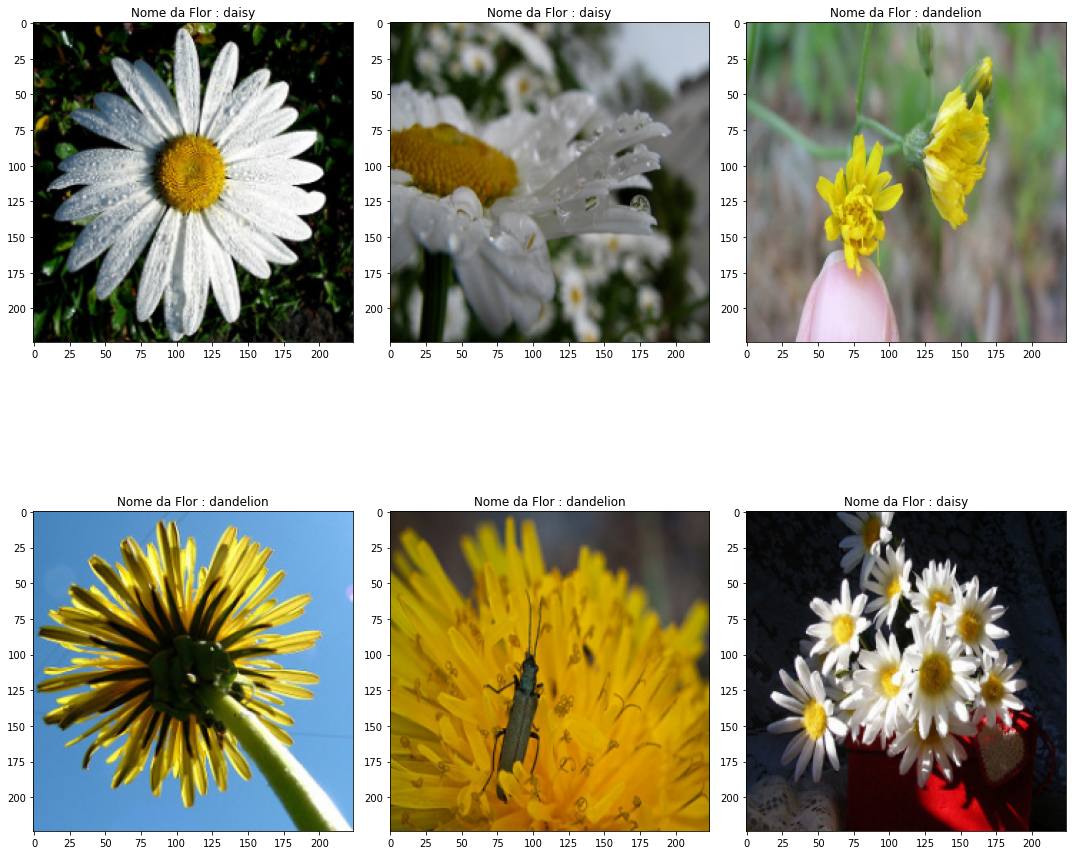

In [ ]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (3):
        r = random.randint(0,len(y_string))
        ax[i,j].imshow(X[r][:,:,::-1])
        ax[i,j].set_title('Nome da Flor : ' + y_string[r])
        
plt.tight_layout()

**SEPARANDO TREINAMENTO E VALIDAÇÃO**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range = 0.1, 
        rotation_range= 15, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True,  
        vertical_flip=True)
datagen.fit(X_train)


**REDE NEURAL CONVOLUCIONAL DO ZERO (CNN)**

In [ ]:
inp = Input((224,224,3))
conv1 = Conv2D(64, (5,5), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv1 = BatchNormalization()(conv1)
conv2 = Conv2D(96, (4,4), padding='valid', activation= 'relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv2 = BatchNormalization()(conv2)
conv3 = Conv2D(128, (3,3), padding='valid', activation= 'relu')(conv2)
conv3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv3 = BatchNormalization()(conv3)
conv4 = Conv2D(256, (3,3), padding='valid', activation= 'relu')(conv3)
conv4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv4 = BatchNormalization()(conv4)
flat = Flatten()(conv4)
dense1 = Dense(512, activation= 'relu')(flat)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation= 'relu')(dense1)
dense2 = Dropout(0.1)(dense2)
out = Dense(2, activation = 'softmax')(dense2)
#out = Dense(5, activation = 'softmax')(dense2)
model = Model(inp, out)
model.compile(optimizer = tf.keras.optimizers.Nadam(lr = 0.0001) , loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
#Treinamento da CNN
nadam = tf.keras.optimizers.Nadam(lr = 0.0001)
filepath = 'my-CNN.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5'
lr_red = keras.callbacks.ReduceLROnPlateau(monitor='acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
chkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
model.compile(optimizer = nadam , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 2, initial_epoch = 0, validation_data = (X_val, y_val))

**GRÁFICOS**

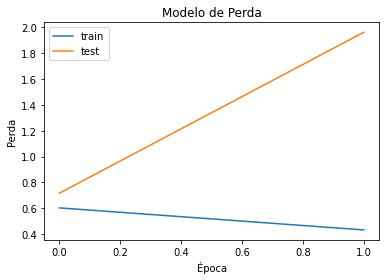

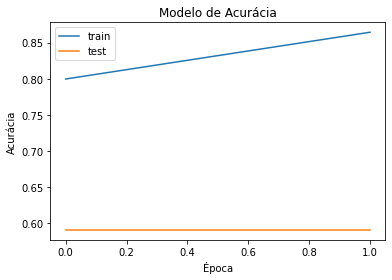

In [ ]:
##Modelo de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['train', 'test'])
plt.show()

##Modelo de Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'test'])
plt.show()

**TRANSFER LEARNING**

In [ ]:
vgg = tf.keras.applications.VGG16(input_shape=(224,224,3), include_top = False, weights= 'imagenet')


In [ ]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
#Blocando o treinamento das camadas convolucionais
for layer in tf_model.layers[:20]:
  layer.trainable=False

tf_model.summary()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
filepath = 'TF-CNN.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5'
lr_red = keras.callbacks.ReduceLROnPlateau(monitor='acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
chkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
tf_model.compile(optimizer = tf.keras.optimizers.Nadam(0.0001) , loss = 'categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1, epochs = 2, initial_epoch = 0, validation_data = (X_val, y_val))

Epoch 1/2
46/46 [==============================] - 433s 9s/step - loss: 0.3325 - accuracy: 0.8864 - val_loss: 1.4341 - val_accuracy: 0.5907
Epoch 2/2
46/46 [==============================] - 451s 10s/step - loss: 0.2548 - accuracy: 0.9118 - val_loss: 1.3423 - val_accuracy: 0.5907


**GRÁFICOS**

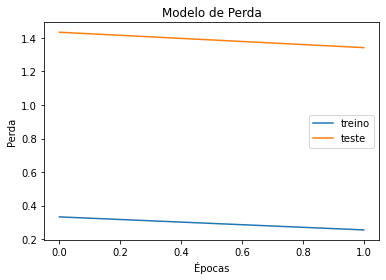

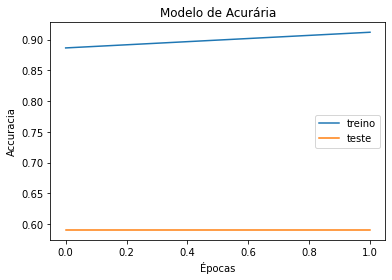

In [ ]:
##Modelo de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Perda')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend(['treino', 'teste'])
plt.show()

##Modelo de Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de Acurária')
plt.ylabel('Accuracia')
plt.xlabel('Épocas')
plt.legend(['treino', 'teste'])
plt.show()

**CLASSIFICANDO ALGUNS EXEMPLOS**

In [ ]:
pred = tf_model.predict(X_val)
pred = np.argmax(pred, axis = 1)
pred = pd.DataFrame(pred).replace({0:'daisy',1:'dandelion',2:'rose',3:'sunflower',4:'tulip'})

y_val_string = np.argmax(y_val, axis = 1)
y_val_string = pd.DataFrame(y_val_string).replace({0:'daisy',1:'dandelion',2:'rose',3:'sunflower',4:'tulip'})

In [ ]:
mis_class = []
for i in range(len(y_val_string)):
    if(not y_val_string[0][i] == pred[0][i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

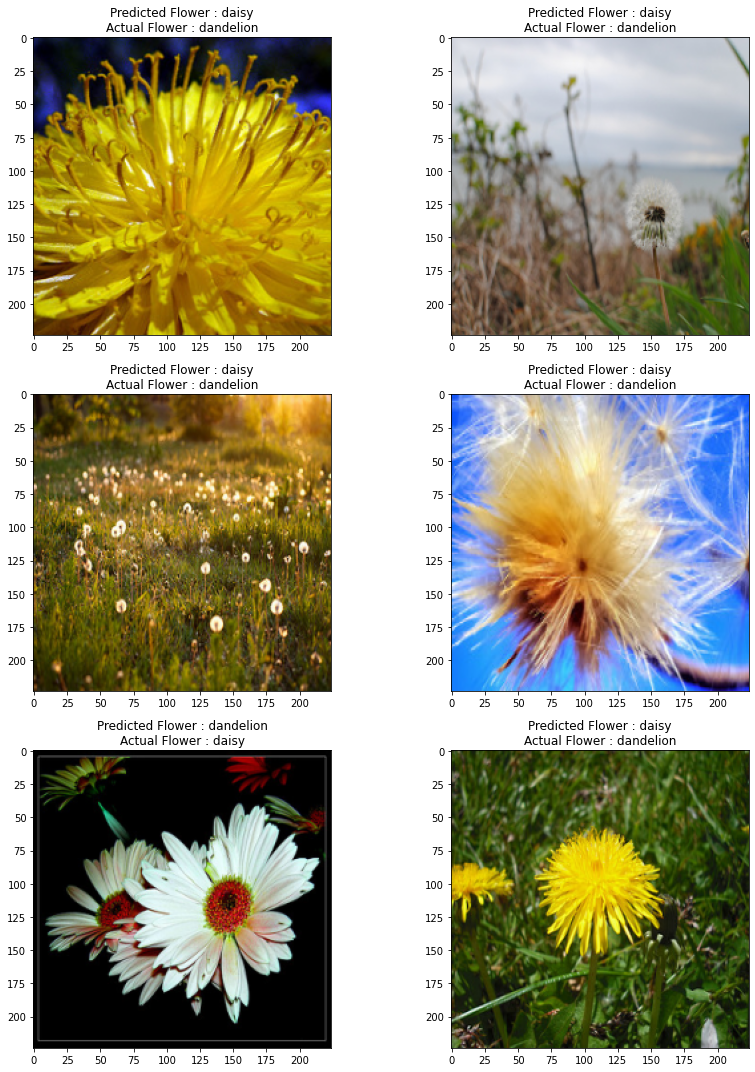

In [ ]:
count = 0
fig,ax = plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(X_val[mis_class[count]][:,:,::-1])
        ax[i,j].set_title("Predicted Flower : "+str(pred[0][mis_class[count]])+"\n"+"Actual Flower : " + str(y_val_string[0][mis_class[count]]))
        plt.tight_layout()
        count+=1